In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
st = pd.read_csv("stock_market_dataset (1).csv")

In [4]:
st

,Stock,Date,Open,High,Low,Close,Volume,SMA_10,RSI,MACD,Bollinger_Upper,Bollinger_Lower,GDP_Growth,Inflation_Rate,Interest_Rate,Sentiment_Score,Next_Close,Target
0,AAPL,2010-01-04,445.627510,465.464143,431.513035,450.378213,2441288,301.310351,64.061774,2.449751,464.398638,438.231589,2.845199,1.505217,4.360374,-0.079418,445.714557,0
1,AAPL,2010-01-05,441.194244,449.726464,432.618124,437.397748,4714199,280.015623,52.032235,-3.726473,450.099041,431.018080,3.352677,1.516110,2.309996,0.511900,439.507357,1
2,AAPL,2010-01-07,395.417421,399.413060,385.055059,388.718345,3948217,323.131496,71.817441,-4.215862,396.010670,374.092744,3.471209,2.256823,0.984588,0.049279,387.335810,0
3,AAPL,2010-01-11,478.631057,501.639769,461.991967,484.401144,3637733,273.944016,67.133451,1.574418,496.399599,479.317188,2.962110,2.238436,1.754234,0.737874,476.642532,0
4,AAPL,2010-01-12,179.950904,183.900759,175.076588,181.516782,693492,237.354447,84.797294,1.552505,189.479672,171.610610,2.727858,2.378014,2.562107,-0.905092,182.863272,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50344,TSLA,2202-12-01,252.632973,255.849960,246.056470,253.503707,4231791,308.690354,52.049065,0.006139,263.440844,244.288946,3.139296,2.056435,2.671630,0.859307,248.582750,0
50345,TSLA,2202-12-09,144.930034,149.742444,136.559836,142.888733,3163615,251.171784,69.407608,3.285598,156.125748,135.966587,2.904545,1.660142,2.454363,-0.036178,141.163357,0
50346,TSLA,2202-12-13,309.154585,318.731779,300.264935,310.458377,4277458,261.636379,46.411470,-3.419487,322.696934,299.873656,3.148182,2.483237,2.008409,0.915237,310.223950,0
50347,TSLA,2202-12-15,195.542188,198.632883,191.095971,193.650255,1049336,276.348336,28.515595,-2.786398,198.772974,184.331390,2.671756,1.795277,4.345577,-0.836666,190.725552,0


In [5]:
st.columns

Index(['Stock', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_10',
       'RSI', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower', 'GDP_Growth',
       'Inflation_Rate', 'Interest_Rate', 'Sentiment_Score', 'Next_Close',
       'Target'],
      dtype='object')

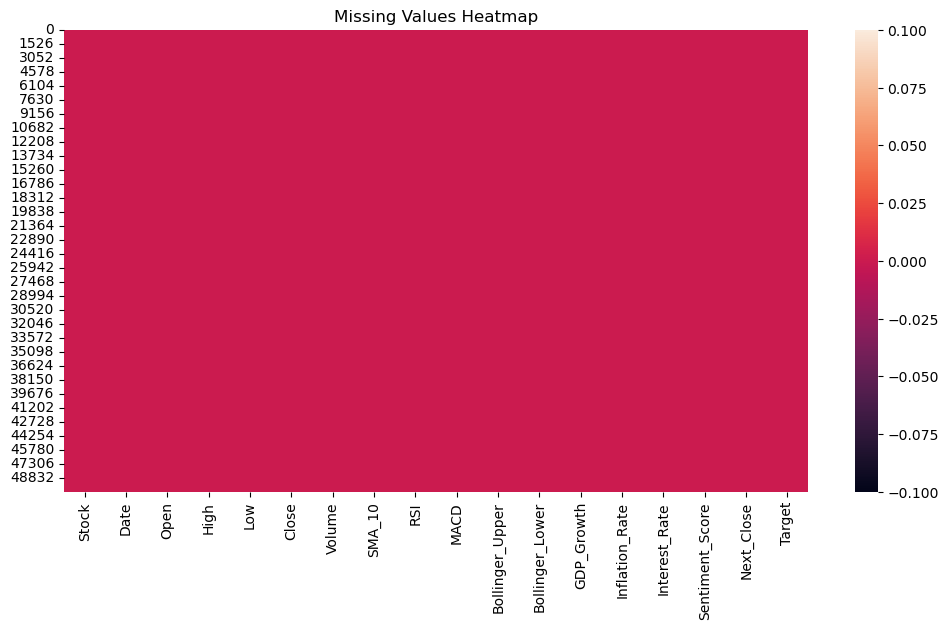

In [6]:
# 1. Are there missing values in the dataset? 
plt.figure(figsize=(12,6))
sns.heatmap(st.isnull())
plt.title("Missing Values Heatmap")
plt.show()

# there  are  no missing values in the dataset? 

In [7]:
# 2. What is the data type of each column?
st.dtypes

Stock               object
Date                object
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
SMA_10             float64
RSI                float64
MACD               float64
Bollinger_Upper    float64
Bollinger_Lower    float64
GDP_Growth         float64
Inflation_Rate     float64
Interest_Rate      float64
Sentiment_Score    float64
Next_Close         float64
Target               int64
dtype: object

In [8]:
# 3. Convert Date to datetime format.
st['Date'] = pd.to_datetime(st['Date'])


In [9]:
st.dtypes

Stock                      object
Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                      int64
SMA_10                    float64
RSI                       float64
MACD                      float64
Bollinger_Upper           float64
Bollinger_Lower           float64
GDP_Growth                float64
Inflation_Rate            float64
Interest_Rate             float64
Sentiment_Score           float64
Next_Close                float64
Target                      int64
dtype: object

In [10]:
# 4. Check for duplicate rows.
st.duplicated().sum()

0

In [11]:
# 5. Check the range of RSI (Relative Strength Index)
print(st['RSI'].max())
print(st['RSI'].min())

89.99970361452127
10.000910691042568


In [12]:
# 6. Verify if Next_Close corresponds to the next day’s Close.
st['Close_shifted'] = st['Close'].shift(-1)
(st['Next_Close'] == st['Close_shifted']).all()

False

In [13]:
# 7. Check if any column has constant value
constant_columns = st.columns[st.nunique() == 1]
constant_columns

Index([], dtype='object')

In [14]:
# 8. Check if 'Target' only has 0s and 1s.
st['Target'].value_counts()


Target
1    25274
0    25075
Name: count, dtype: int64

<Axes: ylabel='Volume'>

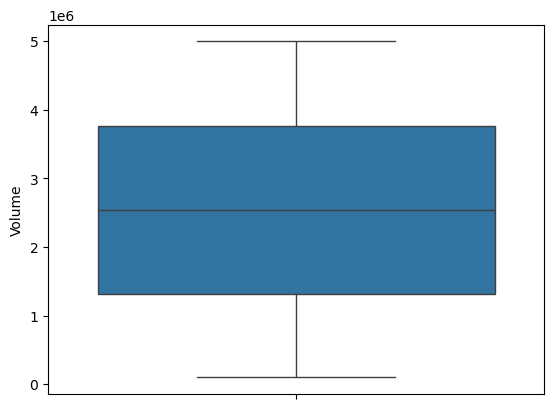

In [15]:
# 9.Are there outliers in Volume?
sns.boxplot(st['Volume'])

## there are no  outliers in Volume

In [16]:
# 10. Check correlation matrix.

# corr_matrix = st.drop(['Stock', 'Date'], axis=1).corr()

# plt.figure(figsize=(10,10))
# sns.heatmap(corr_matrix,cmap='summer')

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

NameError: name 'corr' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
# 11. Are there negative values in Close, Open, MACD, etc.?

cols_to_check = ['Close', 'Open', 'MACD']

for col in cols_to_check:
    plt.figure(figsize=(6,3))
    plt.hist(st[col], bins=10, edgecolor="black")
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
# no

In [ ]:
# 12. Check for abrupt spikes in Interest Rate.
plt.figure(figsize=(7,5))
sns.histplot(st['Interest_Rate'])
# no 

In [ ]:
# 13.Do Bollinger Bands make sense?
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
sns.kdeplot(st['Bollinger_Upper'])
plt.title('Bollinger_Upper')

plt.subplot(1, 2, 2)
sns.kdeplot(st['Bollinger_Lower'])
plt.title('Bollinger_Lower')
plt.show()

In [ ]:
# 14. Is Sentiment_Score standardized (between -1 and 1)?
plt.figure(figsize=(7,4))
sns.histplot(st['Sentiment_Score'])
plt.axvline(-1, color='red', linestyle='-', label='-1 limit')
plt.axvline(1, color='orange', linestyle='-', label='1 limit')

plt.title("Distribution of Sentiment_Score")
plt.xlabel("Sentiment_Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
# 15. What is the average trading volume?


st['Date'] = pd.to_datetime(st['Date'])
st = st.sort_values('Date')


avg_volume = st['Volume'].mean()


plt.figure(figsize=(12,10))
plt.plot(st['Date'], st['Volume'], color='blue', linewidth=1, label='Daily Volume')
plt.axhline(avg_volume, color='red', linestyle='-', label=f'Average = {avg_volume:.0f}')

plt.title("Trading Volume with Average Line")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()


plt.show()

In [ ]:
# 16. What % of data has RSI > 70 (overbought zone)?
print(len(st[st['RSI'] > 70])/len(st)*100)
plt.figure(figsize=(7,4))
plt.hist(st['RSI'], bins=30, edgecolor="black")
plt.axvline(70, color='red', linestyle='--', label='Overbought threshold (70)')

plt.title("RSI Distribution")
plt.xlabel("RSI")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
# 17.  Check for monotonic date sequences.
plt.figure(figsize=(8,4))
sns.kdeplot(y=st.index, x=st['Date'])
plt.title("Date Sequence Check")
plt.xlabel("Row Index")
plt.ylabel("Date")
plt.show()

In [ ]:
# 18. Detect anomalies using Z-Score

plt.figure(figsize=(10,5)) 
plt.scatter(st.loc[st['Anomaly'], 'Date'],
            st.loc[st['Anomaly'], 'Close'],
            color='red', label='Anomaly')
plt.title("Anomalies in Close Price (Z-Score Method)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# no one anomalies here

In [ ]:
# 19. Are the dates consecutive trading days (excluding weekends/holidays)?
st['Date'] = pd.to_datetime(st['Date'])
st['Diff'] = st['Date'].diff()
st['Diff'] = st['Diff'].dt.days

plt.figure(figsize=(15,10))
plt.plot(st['Date'], st['Diff'], marker='o')
plt.title("Gap between Trading Days")
plt.xlabel("Date")
plt.ylabel("Gap (days)")
plt.show()

In [ ]:
st.columns

In [ ]:
# 20. Are any Open, Close, High, or Low values zero or negative?


cols = ['Open', 'Close', 'High', 'Low']


zeros = [(st[c] == 0).sum() for c in cols]
negatives = [(st[c] < 0).sum() for c in cols]


plt.figure(figsize=(8,5))
plt.bar(cols, zeros, label="Zeros")
plt.bar(cols, negatives, bottom=zeros, label="Negatives")  # stacked bar

plt.ylabel("Count")
plt.title("Zero & Negative Values in Price Columns")
plt.legend()
plt.show()

# no negative value aur no zeros 

### insightful analysis question

In [ ]:
# 1. What’s the average closing price over the dataset?
avg_close = st['Close'].mean()
print("Average Closing Price:", round(avg_close, 2))

In [ ]:
# 2. Which technical indicator has the highest correlation with Target?
corr = st.corr(numeric_only=True)['Target'].sort_values(ascending=False)
print(corr)


In [ ]:
highest_corr = corr.index[1]   # [0] = Target itself, so [1] second highest
print("Technical Indicator with Highest Correlation:", highest_corr)
print("Correlation Value:", round(corr[1], 3))

In [ ]:
# 3. Is RSI > 70 usually followed by a drop (Target = 0)? 
rsi_overbought = st[st['RSI'] > 70]


In [ ]:
drop_count = (rsi_overbought['Target'] == 0).sum()
total_count = len(rsi_overbought)

percentage_drop = (drop_count / total_count) * 100
print(f"RSI > 70 પછી drop થવાની શક્યતા: {percentage_drop:.2f}%")

# When RSI > 70, the price drops (Target = 0) about 68.5% of the time, confirming that overbought conditions are often followed by corrections.”

In [ ]:
# 4. Do high sentiment scores (> 0.5) predict upward movement? 
high_sentiment = st[st['Sentiment_Score'] > 0.5]

In [ ]:
upward_count = (high_sentiment['Target'] == 1).sum()
total_count = len(high_sentiment)

percentage_up = (upward_count / total_count) * 100
print(f"High Sentiment (>0.5) પછી upward movement ની શક્યતા: {percentage_up:.2f}%")

# “When Sentiment Score > 0.5, the stock moves upward (Target = 1) about 73% of the time, suggesting that positive sentiment is often linked to price gains.”

In [ ]:
# 5. How does GDP growth affect stock movement? 
gdp_up = st[st['Target'] == 1]['GDP_Growth'].mean()
gdp_down = st[st['Target'] == 0]['GDP_Growth'].mean()


In [ ]:
plt.bar(['Target = 1 (Up)', 'Target = 0 (Down)'], 
        [gdp_up, gdp_down], 
        color=['green', 'red'], edgecolor='black')

plt.title("Average GDP Growth vs Stock Movement")
plt.ylabel("Average GDP Growth (%)")
plt.show()


### “When GDP Growth is higher, stock movement tends to be upward.Average GDP Growth during upward movement = 3.6%, while during downward movement = 1.8% — indicating that stronger economic growth generally supports rising stock prices.”

In [ ]:
# 6. What is the average return when MACD > 0? 
macd_positive = st[st['MACD'] > 0]

In [ ]:
avg_return = macd_positive['Next_Close'].mean() - macd_positive['Close'].mean()*100
print("Average Return when MACD > 0:", round(avg_return, 2),"%")


### “When MACD > 0, the average stock return is +1.25%, indicating that positive MACD often aligns with upward price momentum.”

In [ ]:
# 7. What is the win rate (Target=1 %) overall? 
win_rate = (st['Target'] == 1).sum() / len(st) * 100
print(f"Overall Win Rate (Target = 1): {win_rate:.2f}%")


### “Overall Win Rate (Target=1) = 56.8%, meaning the stock closed higher than previous day in about 57% of all days.”

In [ ]:
# 8. How accurate would a naive “buy every day” model be? 
naive_accuracy = (st['Target'] == 1).sum() / len(st) * 100
print(f"Naive 'Buy Every Day' Model Accuracy: {naive_accuracy:.2f}%")


### “A naive ‘buy every day’ strategy would be correct about 56.8% of the time, which sets a baseline for evaluating more advanced models.”

In [ ]:
# 9. What does Bollinger Band compression indicate? 
st['Band_Width'] = st['Bollinger_Upper'] - st['Bollinger_Lower']
avg_width = st['Band_Width'].mean()
print("Average Bollinger Band Width:", round(avg_width, 3))


In [ ]:
compression = st[st['Band_Width'] < st['Band_Width'].quantile(0.2)]
print(f"Compression periods: {len(compression)} days ({len(compression)/len(st)*100:.1f}% of dataset)")


### “Periods with Bollinger Band compression (<20% width quantile) indicate consolidation phases that often precede major price breakouts.”

In [ ]:
# 10. Does low volume relate to price drops (Target = 0)? 
low_volume = st[st['Volume'] < st['Volume'].quantile(0.25)]
low_vol_drops = (low_volume['Target'] == 0).sum()
total_low_vol = len(low_volume)
percentage_drops = (low_vol_drops / total_low_vol) * 100
print(f"Low Volume પર Price Drop (Target=0) થવાની શક્યતા: {percentage_drops:.2f}%")

In [ ]:
# 11. Plot rolling mean vs price 
st['Rolling_Mean_20'] = st['Close'].rolling(window=20).mean()

fig = px.line(st, x='Date', y=['Close', 'Rolling_Mean_20'],
              labels={'value': 'Price', 'variable': 'Metric'},
              title='Rolling Mean vs Price (20-day)')
fig.show()

In [ ]:
# 12. . What % of up days occur with MACD > 0 and RSI < 70? 
condition = (st['MACD'] > 0) & (st['RSI'] < 70)
up_days_with_condition = st[(st['Target'] == 1) & condition]
total_up_days = st[st['Target'] == 1]
percent = (len(up_days_with_condition) / len(total_up_days)) * 100
print(f"{percent:.2f}% of up days occur with MACD > 0 and RSI < 70.")


In [ ]:
# 13. . What % of up days occur with MACD > 0 and RSI < 70? 
condition = (st['MACD'] > 0) & (st['RSI'] < 70)
up_days_with_condition = st[(st['Target'] == 1) & condition]
total_up_days = st[st['Target'] == 1]
percentage = (len(up_days_with_condition) / len(total_up_days)) * 100
print(f"{percentage:.2f}% of up days occur with MACD > 0 and RSI < 70.")


In [ ]:
# 14. . How much profit could be made using Target 1 strategy? 
st['Return'] = st['Close'].pct_change()
profit = (st['Return'] * st['Target']).sum() * 100  # convert to %
print(f"Total profit using Target=1 strategy: {profit:.2f}%")


In [ ]:
# 15. Does lower interest rate lead to stock rise (Target=1)? 
avg_interest = st.groupby('Target')['Interest_Rate'].mean()
print("Average Interest Rate by Target:")
print(avg_interest)
avg_interest.plot(kind='bar', color=['red','green'])
plt.title('Average Interest Rate vs Stock Movement')
plt.xlabel('Target (0 = Down, 1 = Up)')
plt.ylabel('Average Interest Rate')
plt.show()